### Resting State EEG: signal pre-processing
EEG signal filtering, artefact rejection and epoching/segmenting.

In [8]:
# Import packages
import mne, os
import numpy as np
import matplotlib.pyplot as plt

# Set default directory
os.chdir('/Users/tanijarv/Documents/GitHub/EEG-pyline')
mne.set_log_level('error')

# Import functions
import signal_processing.pre_process as pre_process
from basic.arrange_data import read_files

Define these variables!

In [9]:
# Folder where to get the raw EEG files
raw_folder = 'Data/Raw/'

# Folder where to export the clean epochs files
clean_folder = 'Data/Clean/'

# Sub-folder for the experiment (i.e. timepoint or group)
exp_folder = 'test_experiment'

# EOG + mastoid channels and stimulus channel
eog_channels = ['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8']
stimulus_channel = 'Status'

# Parameters for filter design
filter_design = dict(l_freq=0.5, h_freq=30, filter_length='auto', method='fir',
                     l_trans_bandwidth='auto', h_trans_bandwidth='auto',
                     phase='zero', fir_window='hamming', fir_design='firwin')

Run this to set the folders for data.

In [10]:
# Get directories of raw EEG files and set export directory for clean files
dir_inprogress = os.path.join(raw_folder,exp_folder)
export_dir = os.path.join(clean_folder,exp_folder)
file_dirs, subject_names = read_files(dir_inprogress,'.bdf')

Files in Data/Raw/test_experiment read in: 1


Run this to pre-process the raw EEG files to clean epochs objects.

[[ 64380      0      1]
 [ 64482      0      8]
 [310153      0      2]]
---
APPLYING FILTER

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 6759 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.2s finished


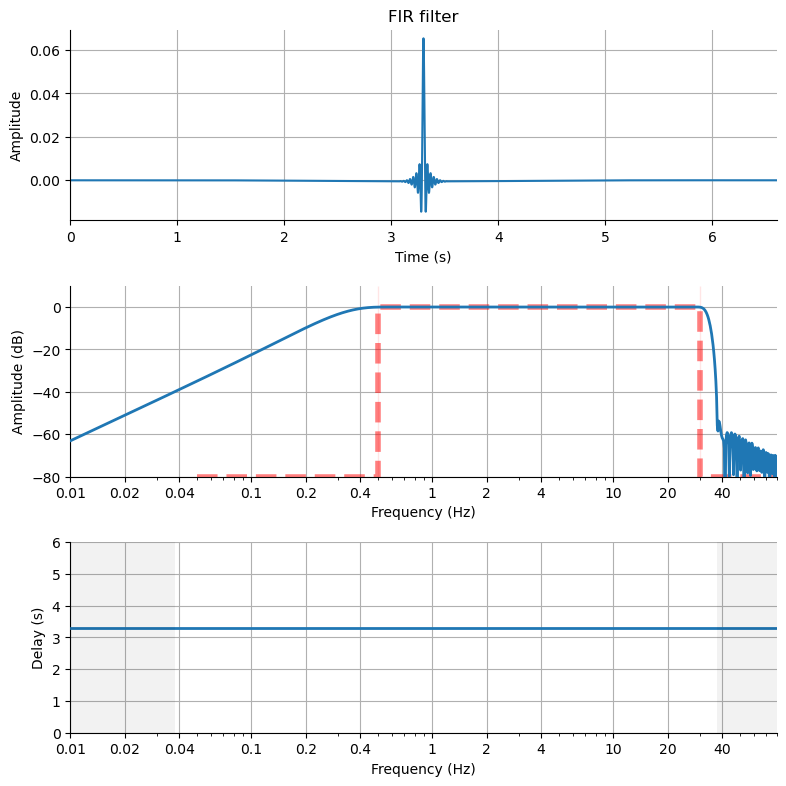

---
APPLYING SSP FOR EOG-REMOVAL

Running EOG SSP computation
Using EOG channels: EXG1, EXG2, EXG3, EXG4, EXG5, EXG6, EXG7, EXG8
EOG channel index for this subject is: [32 33 34 35 36 37 38 39]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10240 samples (10.000 sec)

Now detecting blinks and generating corresponding events
Found 9 significant peaks
Number of EOG events detected: 9
Computing projector
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 35 Hz

FIR filter para

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Not setting metadata
9 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 9 events and 411 original time points ...
0 bad epochs dropped
Adding projection: eeg--0.200-0.200-PCA-01
Done.
---
DIVIDING INTO EPOCHS

Not setting metadata
48 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 48 events and 5120 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.4s finished


---
EPOCHS BEFORE AR



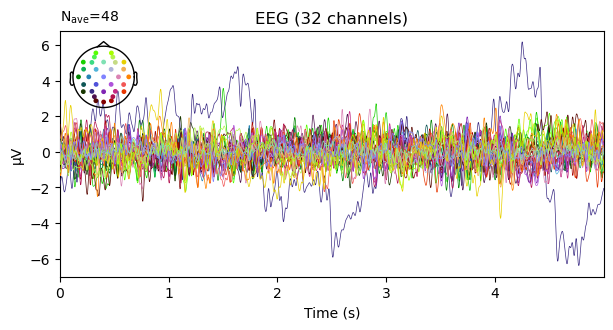

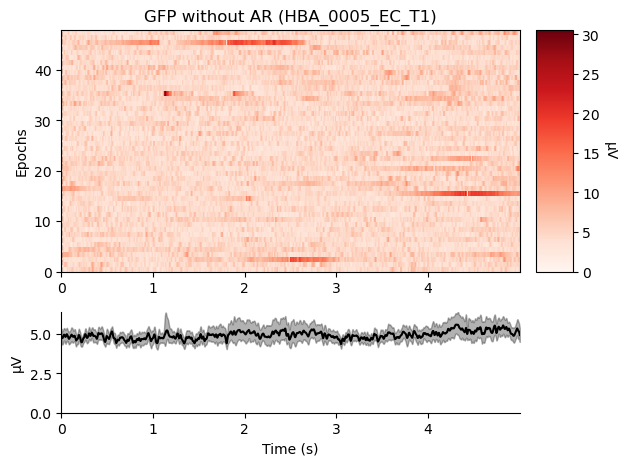

---
APPLYING GLOBAL AR

Estimating rejection dictionary for eeg
Dropping epochs with rejection threshold: {'eeg': 9.629392739606295e-05}
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['P3']
6 bad epochs dropped
---
APPLYING LOCAL AR

Running autoreject on ch_type=eeg




Estimated consensus=1.00 and n_interpolate=31
No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.


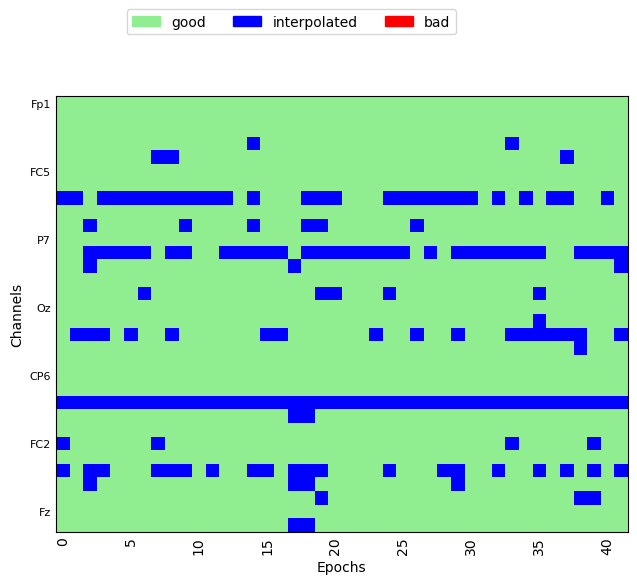

---
EPOCHS AFTER AR



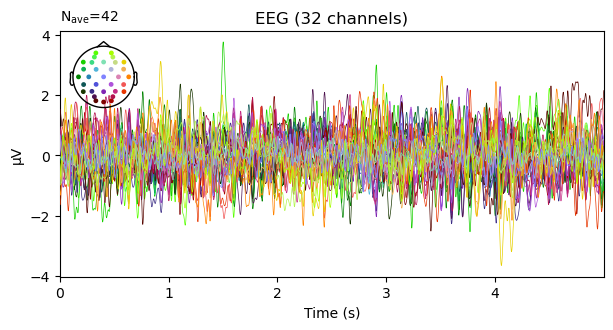

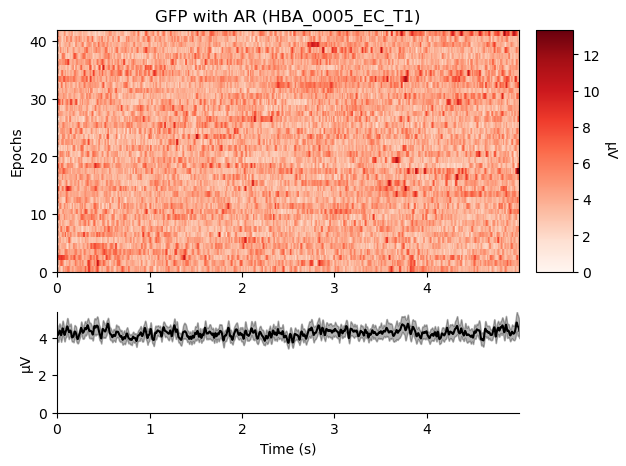

In [11]:
# Loop through all the subjects' directories (EEG files directories)
for i in range(len(file_dirs)):
    # Read in the raw EEG data
    raw = mne.io.read_raw_bdf(file_dirs[i], infer_types=True, eog=eog_channels,
                              stim_channel=stimulus_channel)

    # Set the right montage (Biosemi32) and set reference as average across all channels
    raw = raw.set_montage(mne.channels.make_standard_montage('biosemi32')).load_data()\
             .set_eeg_reference(ref_channels='average')

    # Find stimulus points, i.e. start and end of resting state, and crop the signal
    events = mne.find_events(raw, stim_channel=stimulus_channel, consecutive=False, output='offset')
    print(events)
    cropped_raw = raw.crop(tmin=events[0][0]/raw.info['sfreq'], tmax=events[-1][0]/raw.info['sfreq'])
    cropped_raw = cropped_raw.drop_channels(stimulus_channel)
    
    # Filter the signal with bandpass filter and remove EOG artefacts with SSP
    filt = pre_process.filter_raw_data(cropped_raw, filter_design, line_remove=None,
                                       eog_channels=eog_channels, plot_filt=True, savefig=True)

    # Run artefact rejection function (including AutoReject algorithm) and split to 5-sec epochs
    %matplotlib inline
    epochs = pre_process.artefact_rejection(filt, subject_names[i], epo_duration=5)

    # (Optional) For displaying interactive EEG plots
    #%matplotlib qt
    #epochs.plot(n_channels=32,n_epochs=1)

    # Save the cleaned EEG file as .fif file
    try:
        os.makedirs(export_dir)
    except FileExistsError:
        pass
    try:
        mne.Epochs.save(epochs, fname='{}/{}_clean-epo.fif'.format(export_dir,
                                                                   subject_names[i]),
                                                                   overwrite=True)
    except FileExistsError:
        pass